# Using ML models Predicting Volatility
- Afet Ibadova 453818
- Daryush Ray 455894

## Introduction
**The aim of the Project** - (this part need to be added)

## 1. Data Collection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

ticker_symbol = "^GSPC"
#<---- 20 year data
start_date = "2002-01-01"
end_date = "2022-01-01"

df = yf.download(ticker_symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [3]:
# Check the type of the index
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [4]:
print(df.head(4))
print(df.describe())
print(df.info())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2001-12-31  1161.020020  1161.160034  1148.040039  1148.079956  1148.079956   
2002-01-02  1148.079956  1154.670044  1136.229980  1154.670044  1154.670044   
2002-01-03  1154.670044  1165.270020  1154.010010  1165.270020  1165.270020   
2002-01-04  1165.270020  1176.550049  1163.420044  1172.510010  1172.510010   

                Volume  
Date                    
2001-12-31   943600000  
2002-01-02  1171000000  
2002-01-03  1398900000  
2002-01-04  1513000000  
              Open         High          Low        Close    Adj Close  \
count  5037.000000  5037.000000  5037.000000  5037.000000  5037.000000   
mean   1818.221919  1828.282268  1807.485208  1818.585354  1818.585354   
std     885.127184   888.395202   881.778524   885.442409   885.442409   
min     679.280029   695.270020   666.789978   676.530029   676.530029   
25%  

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## 2. EDA

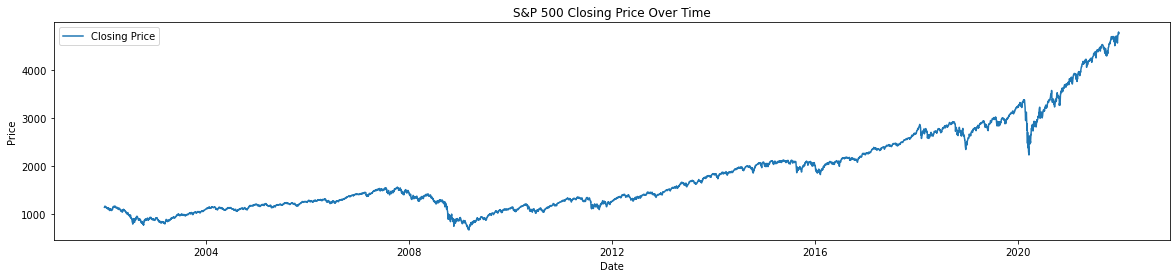

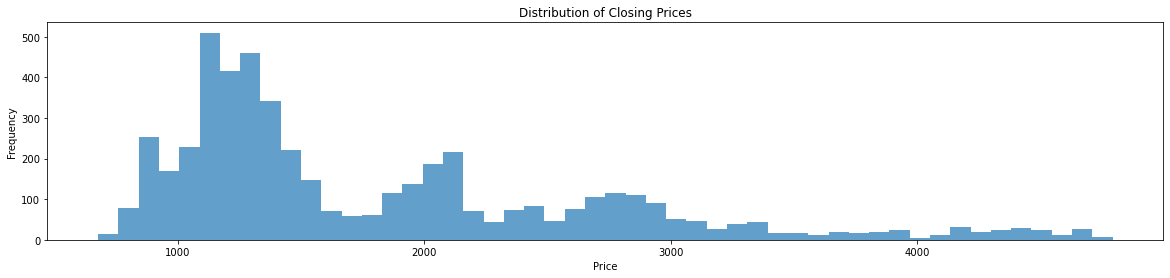

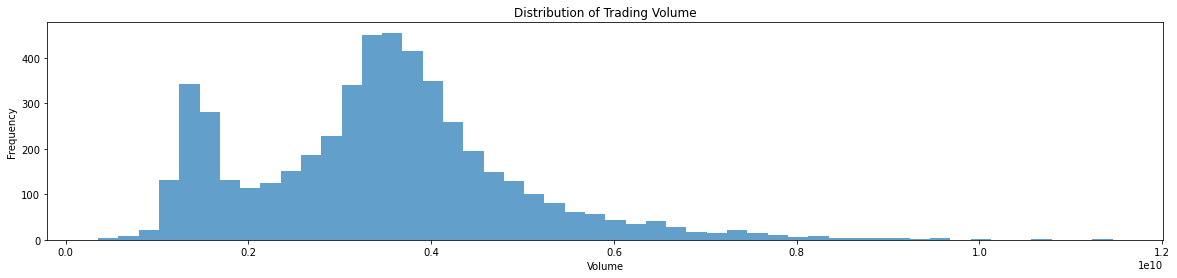

In [6]:
#<--- closing prices
plt.figure(figsize=(20, 4))
plt.plot(df['Close'], label='Closing Price')
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#<--- distribution of closing
plt.figure(figsize=(20, 4))
plt.hist(df['Close'], bins=50, alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#<--- volume
plt.figure(figsize=(20, 4))
plt.hist(df['Volume'], bins=50, alpha=0.7)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

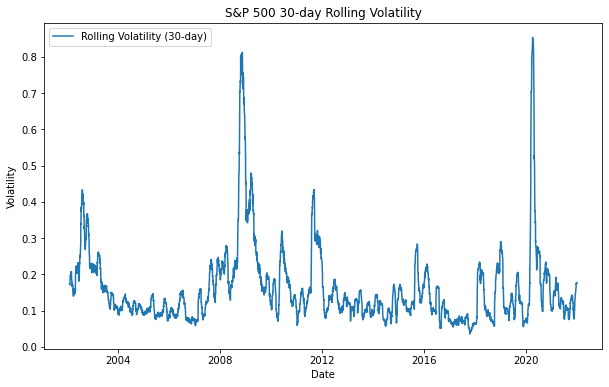

In [7]:
#<--- daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate rolling volatility (30-day window)
df['Volatility'] = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252)  # Annualized

# Plot the volatility
plt.figure(figsize=(10, 6))
plt.plot(df['Volatility'], label='Rolling Volatility (30-day)')
plt.title('S&P 500 30-day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

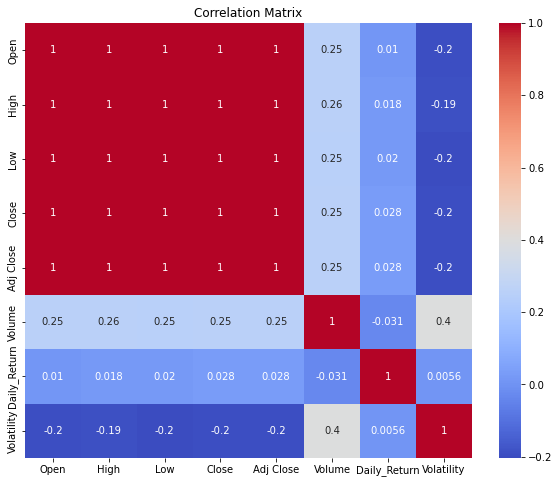

In [8]:
#<--- correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Data Preprocessing and Feature Engineering

In [27]:
df.isnull().sum()

Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Daily_Return                0
Volatility                  0
MA_5d                       0
MA_15d                      0
MA_30d                      0
MA_60d                      0
EMA_5d                      0
EMA_15d                     0
EMA_30d                     0
EMA_60d                     0
RollingMean_5d              0
RollingStd_5d               0
UpperBollinger_5d           0
LowerBollinger_5d           0
RollingMean_15d             0
RollingStd_15d              0
UpperBollinger_15d          0
LowerBollinger_15d          0
RollingMean_30d             0
RollingStd_30d              0
UpperBollinger_30d          0
LowerBollinger_30d          0
RollingMean_60d             0
RollingStd_60d              0
UpperBollinger_60d          0
LowerBollinger_60d          0
RSI                         0
MACD_Line 

In [10]:
df['Daily_Return'].fillna(0, inplace=True) #<--- first day's return we assume 0
df.dropna(inplace=True) #<--- dropping the Volatility windows since it is realitvely small
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily_Return    0
Volatility      0
dtype: int64

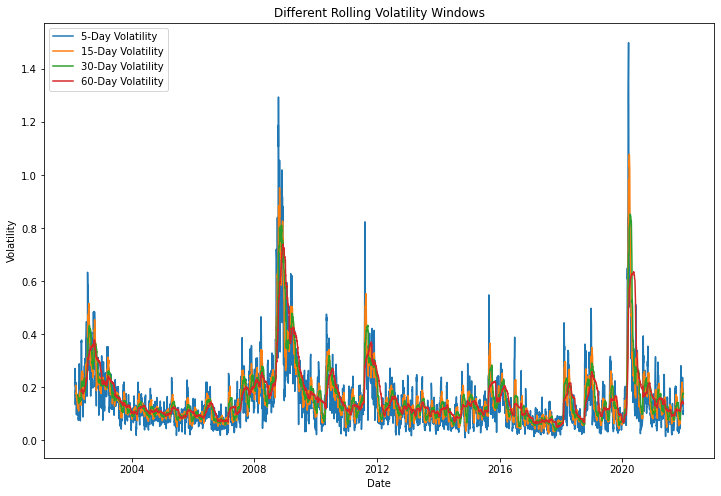

In [11]:
#<--- rolling volatility with different windows

for window in [5, 15, 30, 60]:
    df[f'Volatility_{window}d'] = df['Daily_Return'].rolling(window=window).std() * np.sqrt(252)  # Annualized

##<---- Different window sizes could capture volatility over different time horizons. 15-day window might capture short-term volatility, while a 90-day window might reflect longer-term trends.
plt.figure(figsize=(12, 8))
plt.plot(df['Volatility_5d'], label='5-Day Volatility')
plt.plot(df['Volatility_15d'], label='15-Day Volatility')
plt.plot(df['Volatility_30d'], label='30-Day Volatility')
plt.plot(df['Volatility_60d'], label='60-Day Volatility')
plt.title('Different Rolling Volatility Windows')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

df.drop(columns=['Volatility_5d', 'Volatility_15d', 'Volatility_30d', 'Volatility_60d'], inplace=True)


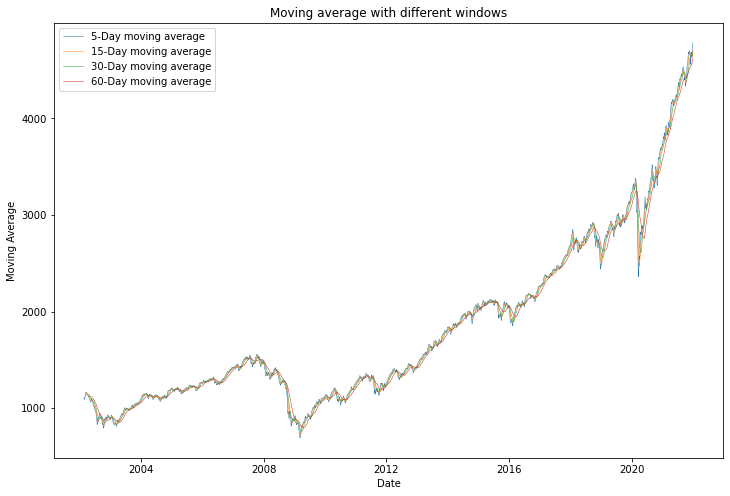

In [12]:
#<--- moving average with different corresponding volatility windows
for window in [5, 15, 30, 60]:
    df[f'MA_{window}d'] = df['Close'].rolling(window=window).mean()

##<---- Different window sizes could capture volatility over different time horizons. 15-day window might capture short-term volatility, while a 90-day window might reflect longer-term trends.
plt.figure(figsize=(12, 8))
plt.plot(df['MA_5d'], label='5-Day moving average', linewidth=0.5)
plt.plot(df['MA_15d'], label='15-Day moving average', linewidth=0.5)
plt.plot(df['MA_30d'], label='30-Day moving average', linewidth=0.5)
plt.plot(df['MA_60d'], label='60-Day moving average', linewidth=0.5)
plt.title('Moving average with different windows', )
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

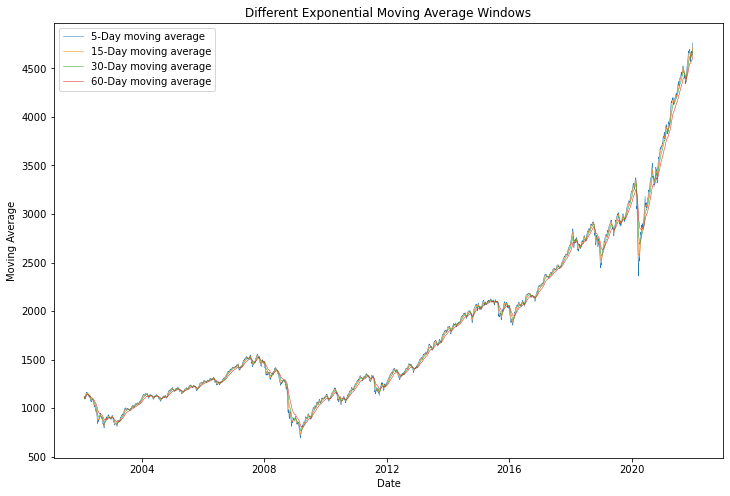

In [13]:
#<--- exponential moving average with different corresponding volatility windows

for window in [5, 15, 30, 60]:
    df[f'EMA_{window}d'] = df['Close'].ewm(span=window).mean()

plt.figure(figsize=(12, 8))
plt.plot(df['EMA_5d'], label='5-Day moving average', linewidth=0.5)
plt.plot(df['EMA_15d'], label='15-Day moving average', linewidth=0.5)
plt.plot(df['EMA_30d'], label='30-Day moving average', linewidth=0.5)
plt.plot(df['EMA_60d'], label='60-Day moving average', linewidth=0.5)
plt.title('Different Exponential Moving Average Windows')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

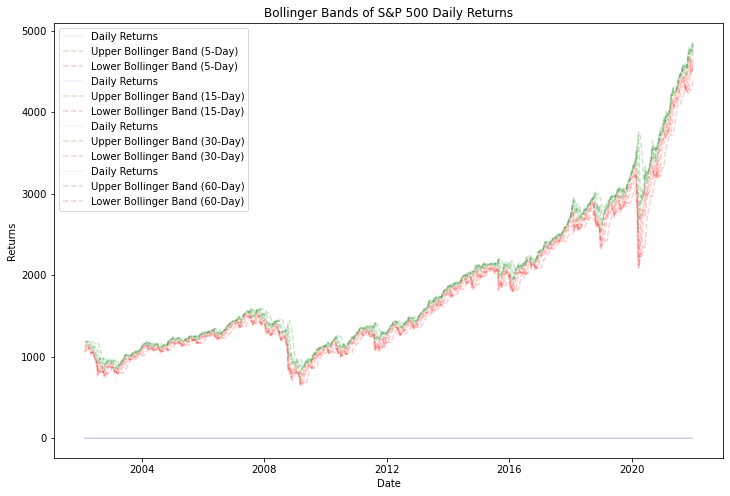

In [14]:
#<--- defining the initial parameters for the Bollinger Bands
Daily_Return_windows = [5, 15, 30, 60]
std_dev_multiplier = 2

#<--- calculating the Bollinger Bands
for window in Daily_Return_windows:
    df[f'RollingMean_{window}d'] = df[f'MA_{window}d']
    df[f'RollingStd_{window}d'] = df['Close'].rolling(window=window).std()
    df[f'UpperBollinger_{window}d'] = df[f'RollingMean_{window}d'] + (df[f'RollingStd_{window}d'] * std_dev_multiplier)
    df[f'LowerBollinger_{window}d'] = df[f'RollingMean_{window}d'] - (df[f'RollingStd_{window}d'] * std_dev_multiplier)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for window in Daily_Return_windows:
    plt.plot(df['Daily_Return'], label='Daily Returns', alpha=0.8, color='blue', linewidth=0.1)
    plt.plot(df[f'UpperBollinger_{window}d'], label=f'Upper Bollinger Band ({window}-Day)', linestyle='--', alpha=0.2, color='green')
    plt.plot(df[f'LowerBollinger_{window}d'], label=f'Lower Bollinger Band ({window}-Day)', linestyle='--', alpha=0.2, color='red')

plt.title('Bollinger Bands of S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

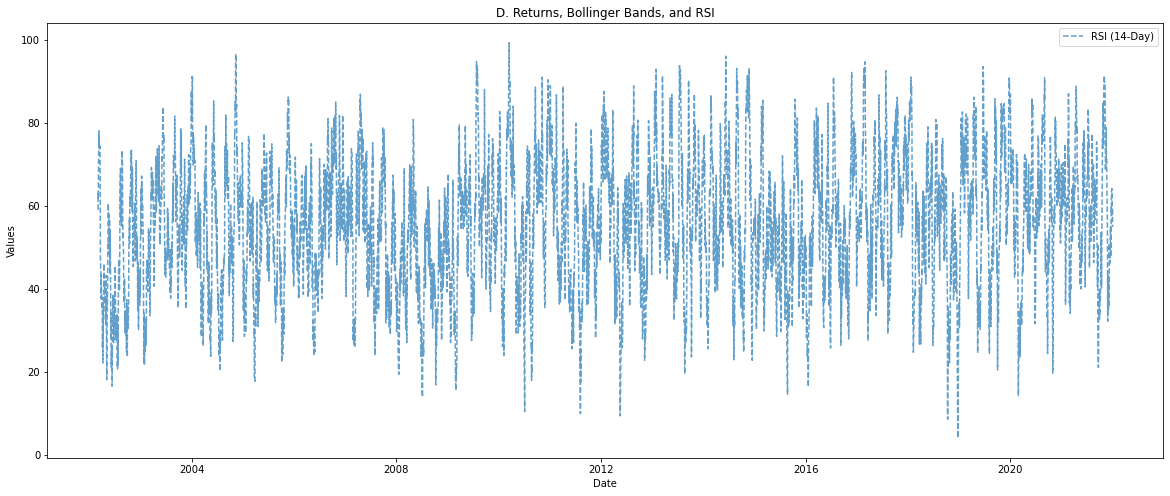

In [15]:
#<--- main function to calculate the RSI
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

rsi_window = 14  #<--- most common window size
df['RSI'] = calculate_rsi(df['Close'], window=rsi_window)

plt.figure(figsize=(20, 8))
plt.plot(df['RSI'], label=f'RSI ({rsi_window}-Day)', linestyle='--', alpha=0.7)

plt.title('D. Returns, Bollinger Bands, and RSI')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

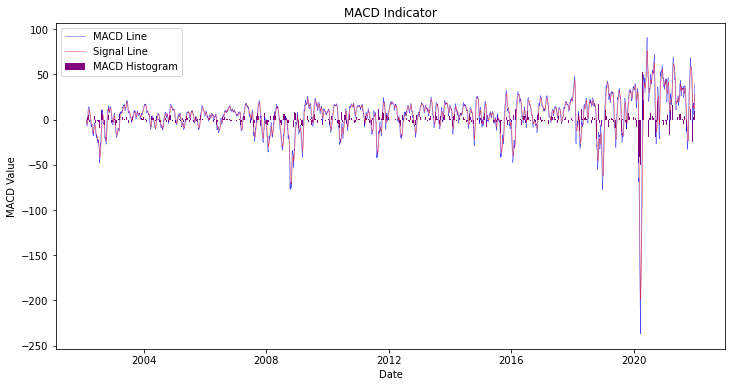

In [16]:
import pandas as pd

df.index = pd.to_datetime(df.index)
#<--- defining the initial parameters for the MACD (most commonly used) <--- to be checked
short_window = 12
long_window = 26

#<--- calculating the 12-day and 26-day EMA
df[f'EMA_{short_window}d'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df[f'EMA_{long_window}d'] = df['Close'].ewm(span=long_window, adjust=False).mean()

#<--- calculating the MACD Line, Signal line and histogram
df['MACD_Line'] = df[f'EMA_{short_window}d'] - df[f'EMA_{long_window}d']

#<--- calculating the Signal Line (9-day EMA of the MACD Line)
df['Signal_Line'] = df['MACD_Line'].ewm(span=9).mean()
#<--- calculating the MACD Histogram (MACD Line - Signal Line)
df['MACD_Histogram'] = df['MACD_Line'] - df['Signal_Line']


# Plotting MACD and Signal Line
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MACD_Line'], label='MACD Line', color='blue', alpha=0.7, linewidth=0.5)
plt.plot(df.index, df['Signal_Line'], label='Signal Line', color='red', alpha=0.7, linewidth=0.5)
plt.bar(df.index, df['MACD_Histogram'], label='MACD Histogram', color='purple', alpha=1)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

#<--- dropping the columns that are not needed (we only need the MACD Line and Signal Line)
df.drop(columns=[f'EMA_{short_window}d', f'EMA_{long_window}d'], inplace=True)

In [17]:
df['Lagged_Close'] = df['Close'].shift(1) #<--- shift by 1 day (simple lag)
df['Lagged_Return'] = df['Daily_Return'].shift(1) #<--- shift by 1 day (simple lag)
df['Lagged_Close_5d'] = df['Close'].shift(5) #<--- 5
df['Lagged_Return_5d'] = df['Daily_Return'].shift(5) #<--- 5
#df[f'Rolling_Vol_{window}d'] = df['Daily_Return'].rolling(window=window).std()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))


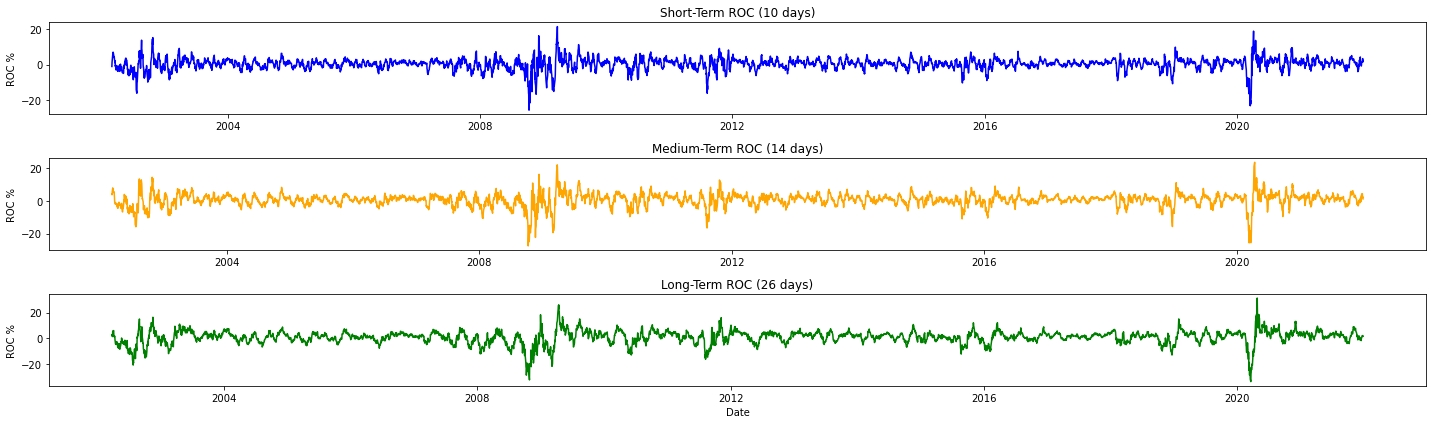

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
#<--- defining the initial parameters for the ROC
short_term_n = 10  #<--- 10 days, short-term
medium_term_n = 14  #<--- 14 days, medium-term
long_term_n = 26   #<--- 26 days, long-term

#<--- calculations
df['ROC_Short_Term'] = ((df['Close'] - df['Close'].shift(short_term_n)) / df['Close'].shift(short_term_n)) * 100
df['ROC_Medium_Term'] = ((df['Close'] - df['Close'].shift(medium_term_n)) / df['Close'].shift(medium_term_n)) * 100
df['ROC_Long_Term'] = ((df['Close'] - df['Close'].shift(long_term_n)) / df['Close'].shift(long_term_n)) * 100

plt.figure(figsize=(20, 6))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['ROC_Short_Term'], label='Short-Term ROC (10 days)', color='blue')
plt.title('Short-Term ROC (10 days)')
plt.ylabel('ROC %')

plt.subplot(3, 1, 2)
plt.plot(df.index, df['ROC_Medium_Term'], label='Medium-Term ROC (14 days)', color='orange')
plt.title('Medium-Term ROC (14 days)')
plt.ylabel('ROC %')

plt.subplot(3, 1, 3)
plt.plot(df.index, df['ROC_Long_Term'], label='Long-Term ROC (26 days)', color='green')
plt.title('Long-Term ROC (26 days)')
plt.xlabel('Date')
plt.ylabel('ROC %')

plt.tight_layout()
plt.show()

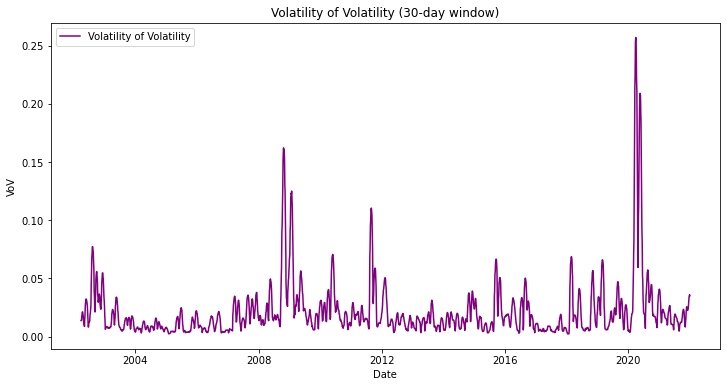

In [19]:
#<--- Volatility of Volatility (VoV) :D :D :D
vov_window = 30

df['Volatility_of_Volatility'] = df['Volatility'].rolling(window=vov_window).std()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility_of_Volatility'], label='Volatility of Volatility', color='purple')
plt.title('Volatility of Volatility (30-day window)')
plt.xlabel('Date')
plt.ylabel('VoV')
plt.legend()
plt.show()



In [20]:
##cell reserved to code Implied Volatility from option market data

In [21]:
correlation_matrix = df.corr()
correlation_matrix.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Volatility,MA_5d,MA_15d,...,MACD_Histogram,Lagged_Close,Lagged_Return,Lagged_Close_5d,Lagged_Return_5d,Log_Return,ROC_Short_Term,ROC_Medium_Term,ROC_Long_Term,Volatility_of_Volatility
Open,1.000000,0.999918,0.999874,0.999795,0.999795,0.249467,0.009903,-0.197829,0.999822,0.999083,...,0.009581,0.999952,0.026986,0.998935,0.024737,0.011650,0.088091,0.107148,0.151476,0.041777
High,0.999918,1.000000,0.999830,0.999888,0.999888,0.252639,0.017895,-0.192923,0.999816,0.999207,...,0.007820,0.999844,0.024752,0.999016,0.023749,0.019524,0.087263,0.105390,0.148841,0.045909
Low,0.999874,0.999830,1.000000,0.999901,0.999901,0.244369,0.019955,-0.203134,0.999661,0.998745,...,0.014953,0.999782,0.027834,0.998615,0.025755,0.021831,0.094942,0.113705,0.157542,0.037401
Close,0.999795,0.999888,0.999901,1.000000,1.000000,0.248297,0.027693,-0.197755,0.999687,0.998914,...,0.012686,0.999692,0.024668,0.998739,0.024395,0.029446,0.093601,0.111576,0.154516,0.042005
Adj Close,0.999795,0.999888,0.999901,1.000000,1.000000,0.248297,0.027693,-0.197755,0.999687,0.998914,...,0.012686,0.999692,0.024668,0.998739,0.024395,0.029446,0.093601,0.111576,0.154516,0.042005


In [22]:
df.dropna(inplace=True) #<--- dropping the Volatility windows since it is realitvely small
#df.isnull().sum()

#### Feature Selection

In [23]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Volatility'])
y = df['Volatility']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False, random_state=777)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


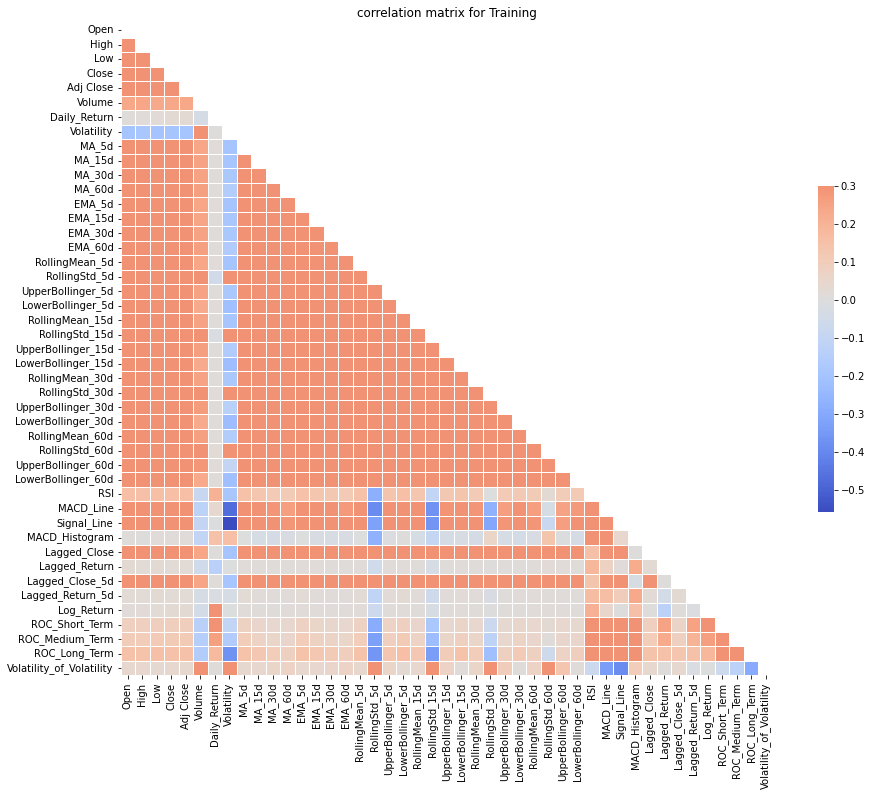

highly correlated variables: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily_Return', 'Volatility', 'MA_5d', 'MA_15d', 'MA_30d', 'MA_60d', 'EMA_5d', 'EMA_15d', 'EMA_30d']


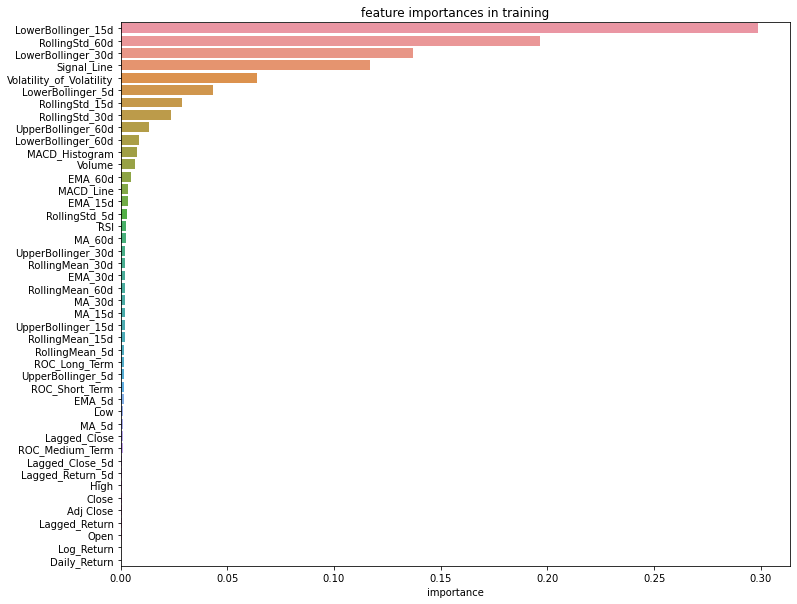

top 15 features: ['LowerBollinger_15d', 'RollingStd_60d', 'LowerBollinger_30d', 'Signal_Line', 'Volatility_of_Volatility', 'LowerBollinger_5d', 'RollingStd_15d', 'RollingStd_30d', 'UpperBollinger_60d', 'LowerBollinger_60d', 'MACD_Histogram', 'Volume', 'EMA_60d', 'MACD_Line', 'EMA_15d']


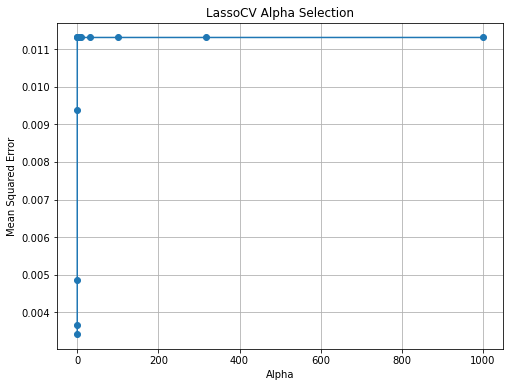

Best alpha: 0.001
Top selected features: Index(['Volume', 'RollingStd_5d', 'LowerBollinger_5d', 'RollingStd_15d',
       'RollingStd_30d', 'LowerBollinger_30d', 'RollingStd_60d', 'RSI',
       'Signal_Line', 'MACD_Histogram', 'Lagged_Return', 'ROC_Short_Term',
       'ROC_Medium_Term', 'ROC_Long_Term', 'Volatility_of_Volatility'],
      dtype='object')


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV, Lasso

#<--- 1. correlation analysis on training
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("correlation matrix for Training")
plt.show()

#<--- highly correlated variables (0.85 threshold)
high_corr_var = [col for col in corr_matrix.columns if any(corr_matrix[col] > 0.85)]
print("highly correlated variables:", high_corr_var[:15])  #<--- 15

#<--- 2. Feature Importance with Random Forest on training
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=777)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title("feature importances in training")
plt.show()

print("top 15 features:", feature_importances.index[:15].tolist())


#<---- 3. Create a LassoCV instance
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=False)

lasso = LassoCV(cv=kf, alphas=np.logspace(-3, 3, 13), max_iter=10000, random_state=777)
lasso.fit(X_train_standardized, y_train)

# Visualize the cross-validated performance of the Lasso model for different alpha values
mse_alphas = np.mean(lasso.mse_path_, axis=1)
plt.figure(figsize=(8, 6))
plt.plot(lasso.alphas_, mse_alphas, marker='o')
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("LassoCV Alpha Selection")
plt.grid(True)
plt.show()

best_alpha = lasso.alpha_
print("Best alpha:", best_alpha)

# Feature Selection using Recursive Feature Elimination (RFE) with Lasso
lasso_best = Lasso(alpha=best_alpha)
rfe = RFE(lasso_best, n_features_to_select=15)  # Adjust the number of features as needed
rfe.fit(X_train_standardized, y_train)
selected_features = X_train.columns[rfe.support_]
print("Top selected features:", selected_features)

## 4. Modelling
### LSTM

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming X_train_standardized and y_train are already prepared

# Reshape input data to be 3D [samples, timesteps, features] for LSTM
# For example, if your data is currently 2D with 100 samples and 30 features:
# X_train_reshaped = X_train_standardized.reshape((100, 1, 30))

X_train_reshaped = X_train_standardized.reshape((X_train_standardized.shape[0], 1, X_train_standardized.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50

112/112 [==============================] - 5s 18ms/step - loss: 0.0058 - val_loss: 0.0087
Epoch 2/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0025 - val_loss: 0.0052
Epoch 3/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 5/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 9.1828e-04
Epoch 6/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 7/50
112/112 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/50
112/112 [==============================] - 1s 6ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 9/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0011 - val_loss: 7.6086e-04
Epoch 10/50
112/112 [==============================] - 1s 5ms/step - loss: 0.0010 - val_

In [26]:
# Evaluate the model
# Reshape X_test as done for X_train
X_test_reshaped = X_test_standardized.reshape((X_test_standardized.shape[0], 1, X_test_standardized.shape[1]))
test_loss = model.evaluate(X_test_reshaped, y_test)

# Make predictions
predictions = model.predict(X_test_reshaped)


16/16 [==============================] - 1s 4ms/step


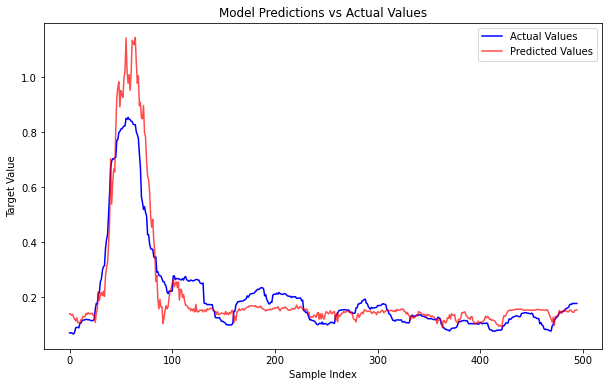

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy arrays and flatten
predictions_flat = np.array(predictions).flatten()
y_test_flat = np.array(y_test).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_flat, label='Actual Values', color='blue')
plt.plot(predictions_flat, label='Predicted Values', color='red', alpha=0.7)
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()
